
(629, 602, 3)


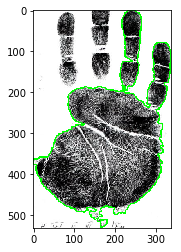

179284


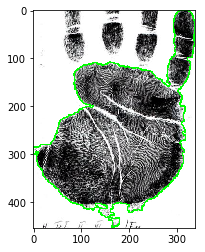

152998


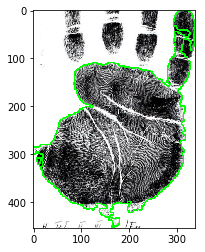

152998


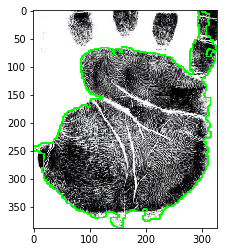

126876


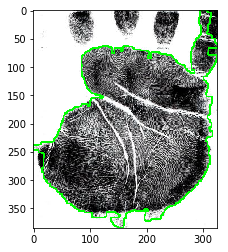

125510


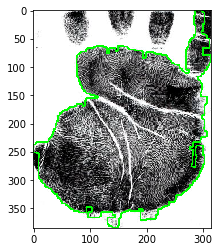

120890


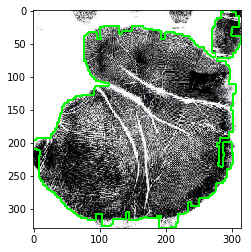

103306


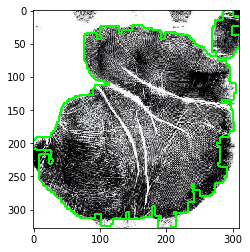

102008


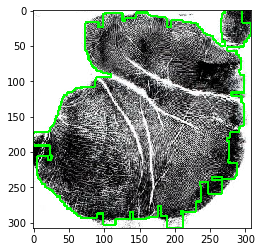

94864


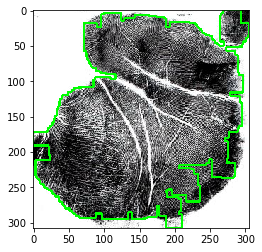

93940


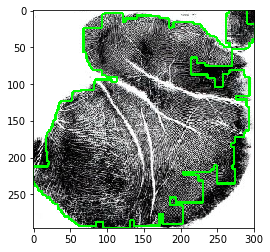

89096


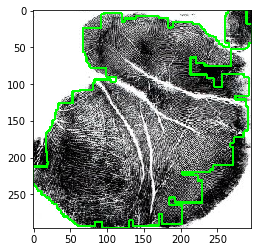

87912


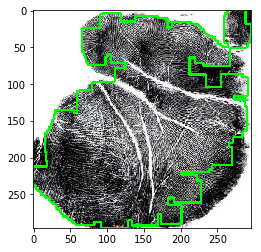

87616


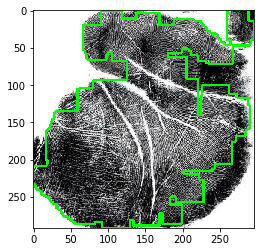

86432


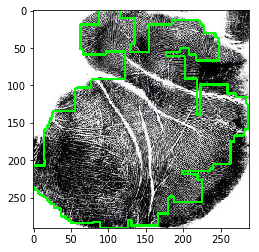

83808


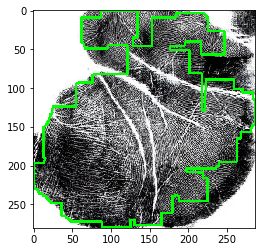

80647


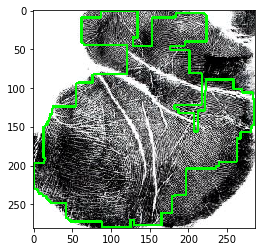

80366


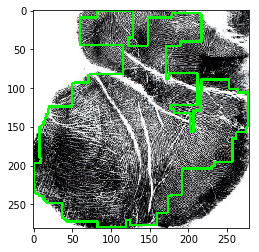

78399


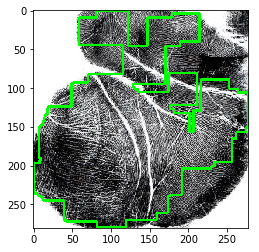

78118


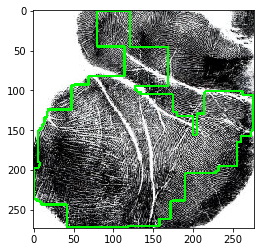

75621


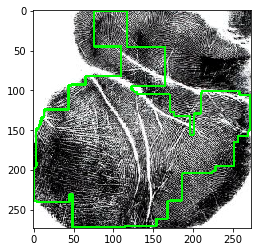

74529


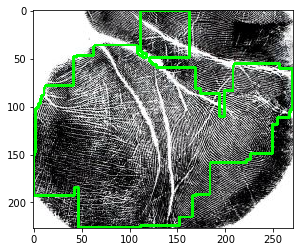

61517


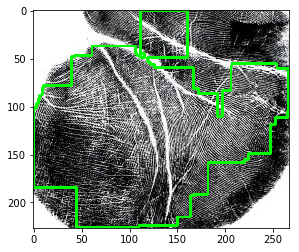

60609


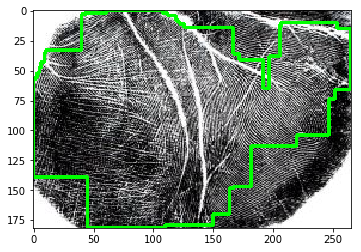

48412


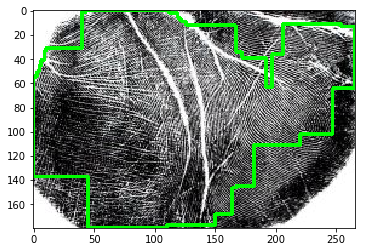

47880


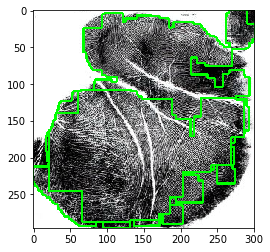

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('./testPics/test6.jpg')
print()
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
# gray = image
canny = cv2.Canny(gray, threshold1=50, threshold2=300)
GauBlur = cv2.GaussianBlur(canny, (3, 3), 0)
#the two lines below are important
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(GauBlur, cv2.MORPH_CLOSE, kernel)
# perform a series of erosions and dilations
areas = []
recorded_cnts = []
for closed_times in np.arange(0, 25):
    closed1 = cv2.erode(closed.copy(), None, iterations=closed_times)
    closed2 = cv2.dilate(closed1.copy(), None, iterations=closed_times)
    # closed = gray - closed
#     plt.imshow(closed)
#     plt.show()
    img_copy = image.copy()
    _, cnts, hierarchy = cv2.findContours(closed2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
    recorded_cnts.append(cnt)
    cv2.drawContours(img_copy, [cnt], -1, (0, 255, 0), 2)
    rect = cv2.boundingRect(cnt)
    roi = img_copy[rect[1]: rect[1]+rect[3], rect[0]: rect[0]+rect[2]]
    plt.imshow(roi)
    plt.show()
    area = rect[3] * rect[2]
    print(area)
    areas.append(area)
areas = np.array(areas)
areas = np.abs(90000-areas)
sort_ares = np.argsort(areas)
cnt = recorded_cnts[sort_ares[0]]
cv2.drawContours(img_copy, [cnt], -1, (0, 255, 0), 2)
rect = cv2.boundingRect(cnt)
roi = img_copy[rect[1]: rect[1]+rect[3], rect[0]: rect[0]+rect[2]]
area = rect[3] * rect[2]
plt.imshow(roi)
plt.show()